## PREDICTING INSURANCE COSTS

### PART 1

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### IMPORTING DATASET

In [2]:
insurance_df=pd.read_csv(r'C:\Users\Admin\Downloads\insurance.csv')
insurance_df1=insurance_df.copy()
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#DESCRIBING THE DATASET
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#GETTING THE COUNTS FOR EACH VALUE IN ALL COLUMNS
for i in insurance_df.columns:
    print(insurance_df[i].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

In [5]:
#CHECKING FOR NULL VALUES AND DATA TYPES OF COLUMNS
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#GETTING ONLY NUMERIC COLUMNS
insurance_df_numeric=insurance_df.select_dtypes('number')
insurance_df_numeric.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


### PART 2

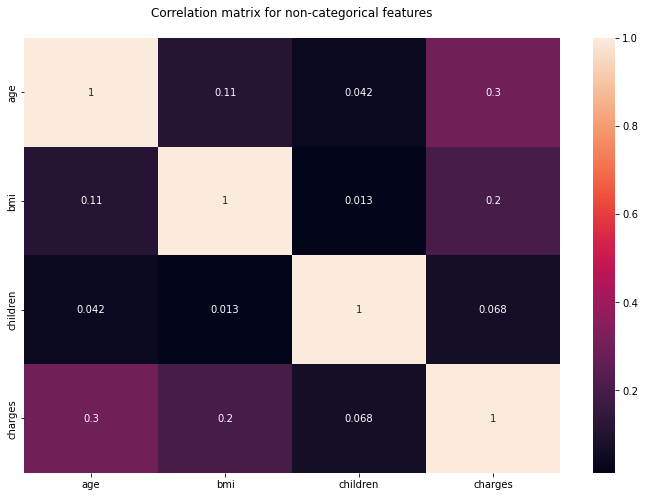

In [7]:
#CHECKING FOR CORRELATION BETWEEN COLUMNS
plt.figure(figsize=(12,8))
sns.heatmap(insurance_df.corr(),annot=True)
plt.title('Correlation matrix for non-categorical features\n')

plt.show()

1) Correlation between BMI and Charges is 0.2

2) Correlation between BMI and Age is 0.11

3) Correlation between Age and Charges is 0.3

However, the correlation between these columns are low.

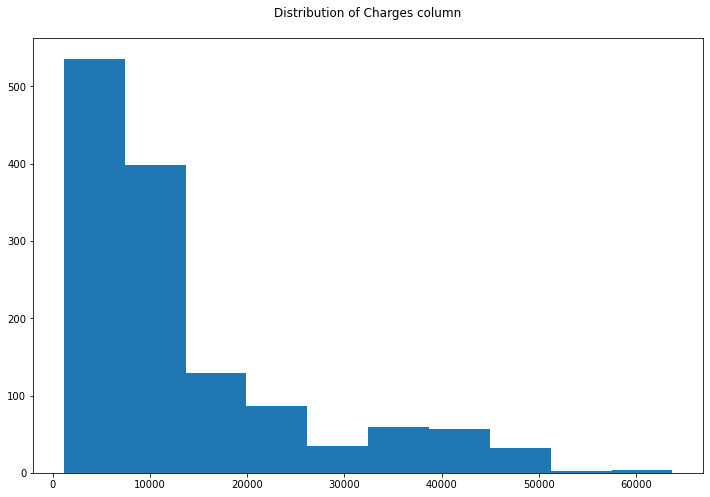

In [8]:
#4)Distribution of charges
plt.figure(figsize=(12,8))
plt.hist(insurance_df['charges'])
plt.title('Distribution of Charges column\n')
plt.show()

In [9]:
insurance_df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
#5) A. CONVERTING BMI INTO 4 CATEGORIES
    
insurance_df1['bmi'].loc[insurance_df['bmi'] <18.5] = 'UnderWeight'
insurance_df1['bmi'].loc[(insurance_df['bmi'] >=18.5)&(insurance_df['bmi'] <25)] = 'NormalWeight'
insurance_df1['bmi'].loc[(insurance_df['bmi'] >=25)&(insurance_df['bmi'] <30)] = 'OverWeight'
insurance_df1['bmi'].loc[insurance_df['bmi'] >=30] = 'Obese'

In [11]:
insurance_df1['bmi'].value_counts()

Obese           707
OverWeight      386
NormalWeight    225
UnderWeight      20
Name: bmi, dtype: int64

In [12]:
insurance_df1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,OverWeight,0,yes,southwest,16884.9240
1,18,male,Obese,1,no,southeast,1725.5523


In [13]:
insurance_df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
#B. REGION VS WEIGHT CATEGORY - POLAR PROJECTION PLOT

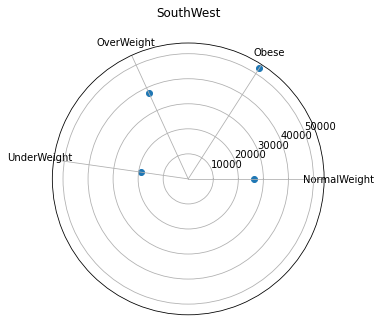

In [15]:
#southwest
df1=insurance_df1[insurance_df1.region=='southwest']
a=df1.groupby(by=['bmi'])['charges'].max()
X=a.index;Y=a[0],a[1],a[2],a[3]
#plotting polar projection
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='polar')
ax.scatter(X,Y)
ax.set_title('SouthWest\n')
plt.show()

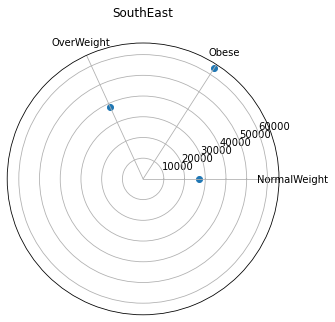

In [16]:
#southeast
df2=insurance_df1[insurance_df1.region=='southeast']
a=df2.groupby(by=['bmi'])['charges'].max()
X=a.index;Y=a[0],a[1],a[2]
#plotting polar projection
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='polar')
ax.scatter(X,Y)
ax.set_title('SouthEast\n')
plt.show()

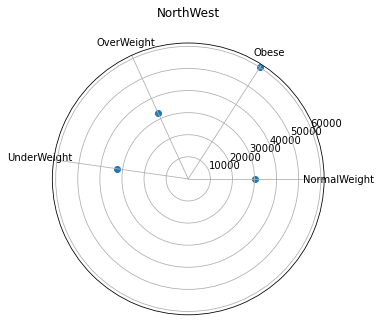

In [17]:
#northwest
df3=insurance_df1[insurance_df1.region=='northwest']
a=df3.groupby(by=['bmi'])['charges'].max()
X=a.index;Y=a[0],a[1],a[2],a[3]
#plotting polar projection
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='polar')
ax.scatter(X,Y)
ax.set_title('NorthWest\n')
plt.show()

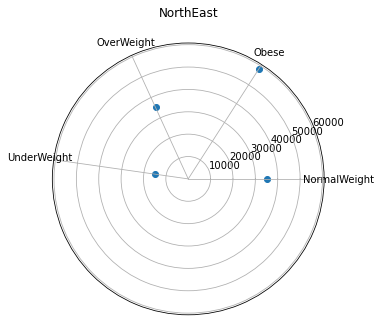

In [18]:
#northeast
df4=insurance_df1[insurance_df1.region=='northeast']
a=df4.groupby(by=['bmi'])['charges'].max()
X=a.index;Y=a[0],a[1],a[2],a[3]
#plotting polar projection
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(projection='polar')
ax.scatter(X,Y)
ax.set_title('NorthEast\n')
plt.show()

In [19]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
insurance_df_numeric_scaled=scaler.fit_transform(insurance_df_numeric)
insurance_df_numeric_scaled=pd.DataFrame(insurance_df_numeric_scaled,columns=insurance_df_numeric.columns)
insurance_df_numeric_scaled.head(2)

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689


### PART 3

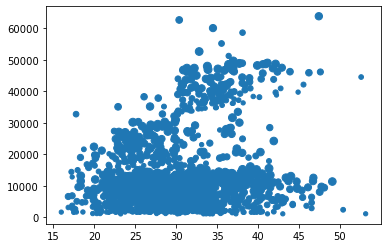

In [20]:
#X-bmi Y-charges Z-age
plt.scatter(insurance_df_numeric.iloc[:,1],insurance_df_numeric.iloc[:,3],\
            insurance_df_numeric.iloc[:,0])
plt.show()

### UNSUPERVISED LEARNING

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering 

                                              FINDING K VALUE
                                              

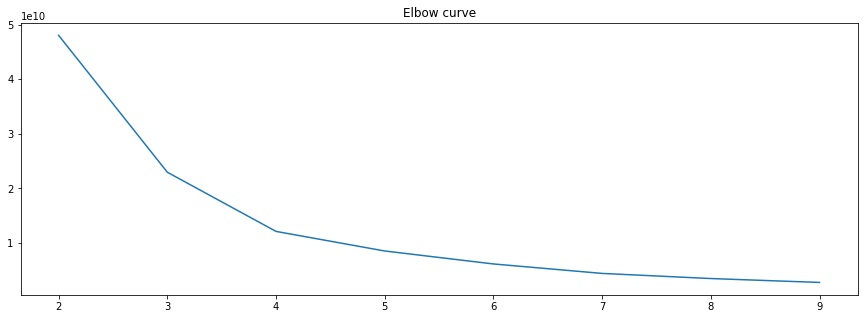

In [22]:
#ELBOW METHOD
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(insurance_df_numeric)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.title('Elbow curve')
# plt.grid(True)
plt.show()

From Elbow method, we find the optimal number of clusters(K value) as either 3 or 4

In [23]:
#SILHOUETTE VALUE

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(insurance_df_numeric)

    silhouette_avg = silhouette_score(insurance_df_numeric, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.6073441686093954
For n_clusters = 4 The average silhouette_score is : 0.6105058852346374
For n_clusters = 5 The average silhouette_score is : 0.5979976836386864
For n_clusters = 6 The average silhouette_score is : 0.569046864875117


Choosing Number of clusters as 4 as a result from elbow method and silhouette value

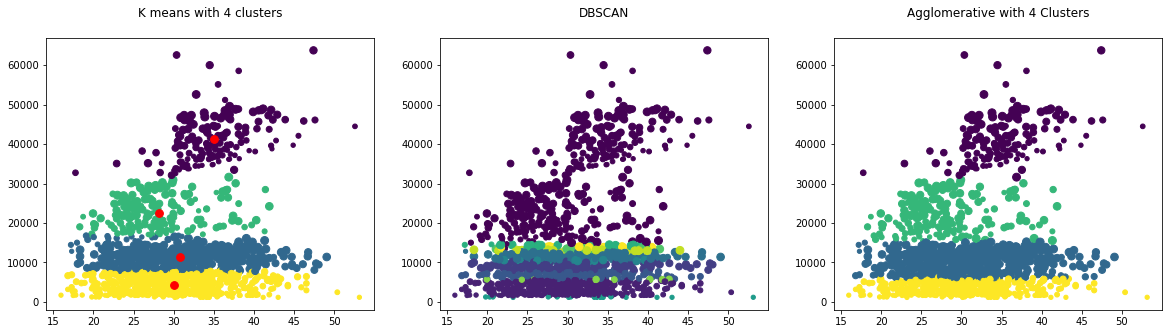

In [24]:
fig, axs = plt.subplots(1, 3,figsize=(20,5))
df2 = insurance_df_numeric[['bmi', 'charges']]

#METHOD 1:- K Means
kmeans = KMeans(n_clusters=4).fit(df2)

df2['Kmeans_Labels'] = kmeans.labels_
centroids = kmeans.cluster_centers_
# print(centroids)
axs[0].scatter(df2.iloc[:,0],df2.iloc[:,1],insurance_df_numeric['age'],c=df2['Kmeans_Labels'])
axs[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=60)
axs[0].set_title('K means with 4 clusters\n')

#METHOD 2:- DBSCAN
db = DBSCAN(eps=100,min_samples=10).fit(df2[['bmi', 'charges']])

df2['dbscan_Labels'] = db.labels_
# O=np.sum(df2['dbscan_Labels']==-1)
# print('OUTLIERS:',O)
axs[1].scatter(df2.iloc[:,0],df2.iloc[:,1],insurance_df_numeric['age'],c=df2['dbscan_Labels'])
axs[1].set_title('DBSCAN\n')

#METHOD 3:- AGGLOMERATIVE CLUSTERING
agglom = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(df2[['bmi', 'charges']])

df2['agglo_Labels'] = agglom.labels_

axs[2].scatter(df2.iloc[:,0],df2.iloc[:,1],insurance_df_numeric['age'],c=df2['agglo_Labels'])
axs[2].set_title('Agglomerative with 4 Clusters\n')
plt.show()

From these three technique,DBSCAN performs bad as the clusters are not clear.

While K means is performing good with 4 clusters

And Agglomerative clustering is performing good with Ward linkage and Number of clusters is 4.

From clustering it is found that Agglomerative clustering and K means have same characteristics as they form same type of clusters.

In [25]:
df2.groupby(by=['Kmeans_Labels'])['charges'].max()

Kmeans_Labels
0    63770.42801
1    16884.92400
2    31620.00106
3     7749.15640
Name: charges, dtype: float64

In [26]:
df2['Charges_Category']=df2['Kmeans_Labels'].replace([0,1,2,3],['LOW TIER','MEDIUM TIER2','HIGH TIER','MEDIUM TIER1'])
df2.head()

,bmi,charges,Kmeans_Labels,dbscan_Labels,agglo_Labels,Charges_Category
0,27.900,16884.92400,1,-1,2,MEDIUM TIER2
1,33.770,1725.55230,3,0,3,MEDIUM TIER1
2,33.000,4449.46200,3,0,3,MEDIUM TIER1
3,22.705,21984.47061,2,-1,2,HIGH TIER
4,28.880,3866.85520,3,0,3,MEDIUM TIER1


Charges_Category is a new column created based on K means clustering.

Where,

'LOW TIER' indicates charges value between      1121.87390 and 7749.15640

'MEDIUM TIER1' indicates charges value between  7789.63500 and 16884.92400

'MEDIUM TIER2' indicates charges value between  17043.34140 and 31620.00106

'HIGH TIER' indicates charges value between     32108.66282 and 63770.42801

### PART 4

### SUPERVISED LEARNING

In [27]:
insurance_df_numeric.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


#### LINEAR REGRESSION

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
#Splitting targets and features
X=insurance_df_numeric_scaled.iloc[:,:3]
y=insurance_df_numeric_scaled.iloc[:,3:]
X.shape,y.shape

((1338, 3), (1338, 1))

In [30]:
#spliting the dataset into training set and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

#fitting linear regression into the training set

TheModel = LinearRegression()
TheModel.fit(X_train, y_train)

#predicting the test set results

ThePrediction = TheModel.predict(X_test)
ThePrediction1 = TheModel.predict(X_train)
#print ('Prediction Value of TEST DEPENDENT:\n',ThePrediction)
print ('Score(R square) of the test data before adding categorical feature is:',round(TheModel.score(X_test,y_test)*100,2),'%')
print('MSE of the test data before adding categorical feature:',round(mean_squared_error(ThePrediction,y_test),2))
print ('Score(R square) of the train data before adding categorical feature is:',round(TheModel.score(X_train,y_train)*100,2),'%')
print('MSE of the train data before adding categorical feature:',round(mean_squared_error(ThePrediction1,y_train),2))

Score(R square) of the test data before adding categorical feature is: 16.3 %
MSE of the test data before adding categorical feature: 0.91
Score(R square) of the train data before adding categorical feature is: 10.67 %
MSE of the train data before adding categorical feature: 0.87


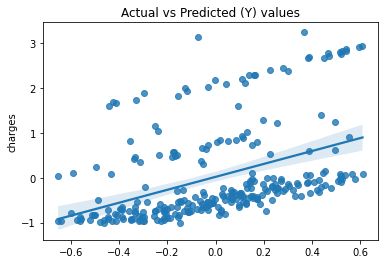

In [31]:
sns.regplot(ThePrediction,y_test)
plt.title('Actual vs Predicted (Y) values')
plt.show()

In [32]:
#Adding a categorical data to the numeric ones-selecting Smoker feature
insurance_newdf=insurance_df_numeric.copy()
insurance_newdf['smoker']=insurance_df['smoker']=='yes'
insurance_newdf=insurance_newdf.astype(float)
insurance_newdf_scaled=scaler.fit_transform(insurance_newdf)
insurance_newdf_scaled=pd.DataFrame(insurance_newdf_scaled,columns=insurance_newdf.columns)
insurance_newdf_scaled.head(2)

,age,bmi,children,charges,smoker
0,-1.438764,-0.453320,-0.908614,0.298584,1.970587
1,-1.509965,0.509621,-0.078767,-0.953689,-0.507463


In [33]:
#Splitting targets and features
X1=insurance_newdf_scaled[['age','bmi','children','smoker']]
y1=insurance_newdf_scaled[['charges']]
X1.shape,y1.shape

((1338, 4), (1338, 1))

In [34]:
#spliting the dataset into training set and test set

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=0)

#fitting linear regression into the training set

Model = LinearRegression()
Model.fit(X1_train, y1_train)

#predicting the test set results

Prediction = Model.predict(X1_test)
Prediction1 = Model.predict(X1_train)
#print ('Prediction Value of TEST DEPENDENT:\n',Prediction)
print ('Score(R square) of the test data after adding categorical feature is:',round(Model.score(X1_test,y1_test)*100,2),'%')
print('MSE of the test data after adding categorical feature :',round(mean_squared_error(Prediction,y1_test),2))
print ('Score(R square) of the train data after adding categorical feature is:',round(Model.score(X1_train,y1_train)*100,2),'%')
print('MSE of the train data after adding categorical feature :',round(mean_squared_error(Prediction1,y1_train),2))

Score(R square) of the test data after adding categorical feature is: 79.78 %
MSE of the test data after adding categorical feature : 0.22
Score(R square) of the train data after adding categorical feature is: 73.61 %
MSE of the train data after adding categorical feature : 0.26


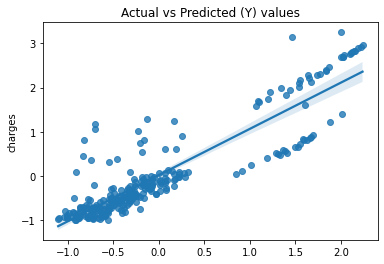

In [35]:
sns.regplot(Prediction,y1_test)
plt.title('Actual vs Predicted (Y) values')
plt.show()

Both the test and train data results are improved after adding a categorical feature 'smoker'.

Previously the MSE of test data was 0.91, after adding smoker feature it became 0.22.

### PART 5

### DECISION TREES - REGRESSOR

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [37]:
from sklearn import preprocessing
insurance_df2=insurance_df.copy()
#Encoding region,smoker,sex variable to numerical variable
surviver_encoder = preprocessing.LabelEncoder()

# Encoding of the region
surviver_encoder.fit(insurance_df2.region)
print(surviver_encoder.classes_)
insurance_df2.region = surviver_encoder.transform(insurance_df2.region)

# Encoding of the smoker
surviver_encoder.fit(insurance_df2.smoker)
print(surviver_encoder.classes_)
insurance_df2.smoker = surviver_encoder.transform(insurance_df2.smoker)

# Encoding of the sex
surviver_encoder.fit(insurance_df2.sex)
print(surviver_encoder.classes_)
insurance_df2.sex = surviver_encoder.transform(insurance_df2.sex)

['northeast' 'northwest' 'southeast' 'southwest']
['no' 'yes']
['female' 'male']


In [38]:
#CHANGING THE TYPE AS CATEGORICAL 
insurance_df2['region'] = insurance_df2.region.astype('category')
insurance_df2['smoker'] = insurance_df2.smoker.astype('category')
insurance_df2['sex'] = insurance_df2.sex.astype('category')

In [39]:
# CRETAING DUMMIES
region_dummies = pd.get_dummies(insurance_df2.region, prefix="region")
insurance_df2_with_dummies = pd.concat([insurance_df2,region_dummies],axis='columns')
insurance_df2_with_dummies.drop('region',axis='columns',inplace=True)

smoker_dummies = pd.get_dummies(insurance_df2.smoker, prefix="smoker")
insurance_df2_with_dummies = pd.concat([insurance_df2_with_dummies,smoker_dummies],axis='columns')
insurance_df2_with_dummies.drop('smoker',axis='columns',inplace=True)

sex_dummies = pd.get_dummies(insurance_df2.sex, prefix="sex")
insurance_df2_with_dummies = pd.concat([insurance_df2_with_dummies,sex_dummies],axis='columns')
insurance_df2_with_dummies.drop('sex',axis='columns',inplace=True)

In [40]:
insurance_df2_with_dummies.head(2)

,age,bmi,children,charges,region_0,region_1,region_2,region_3,smoker_0,smoker_1,sex_0,sex_1
0,19,27.90,0,16884.9240,0,0,0,1,0,1,1,0
1,18,33.77,1,1725.5523,0,0,1,0,1,0,0,1


In [41]:
X2=insurance_df2_with_dummies[['age','bmi','children','region_0','region_1','region_2','region_3','smoker_0','smoker_1','sex_0','sex_1']]
y2=insurance_df2_with_dummies.charges
X2.shape,y2.shape

((1338, 11), (1338,))

In [42]:
#spliting the dataset into training set and test set

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=0)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [43]:
#CREATE DECISION TREE REGRESSION OBJECT(DTR)
dtm = DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)

# FIT DTC & PREDICTING RESPONSE FOR TEST SET
dtm.fit(X2_test,y2_test)   
print("R-SQUARE FOR TEST DATASET:",round(dtm.score(X2_test,y2_test)*100,2),'%')

# FIT DTC & PREDICTING RESPONSE FOR TEST SET
dtm.fit(X2_train,y2_train)
print("R-SQUARE FOR TRAIN DATASET:",round(dtm.score(X2_train,y2_train)*100,2),'%')

R-SQUARE FOR TEST DATASET: 90.01 %
R-SQUARE FOR TRAIN DATASET: 84.66 %


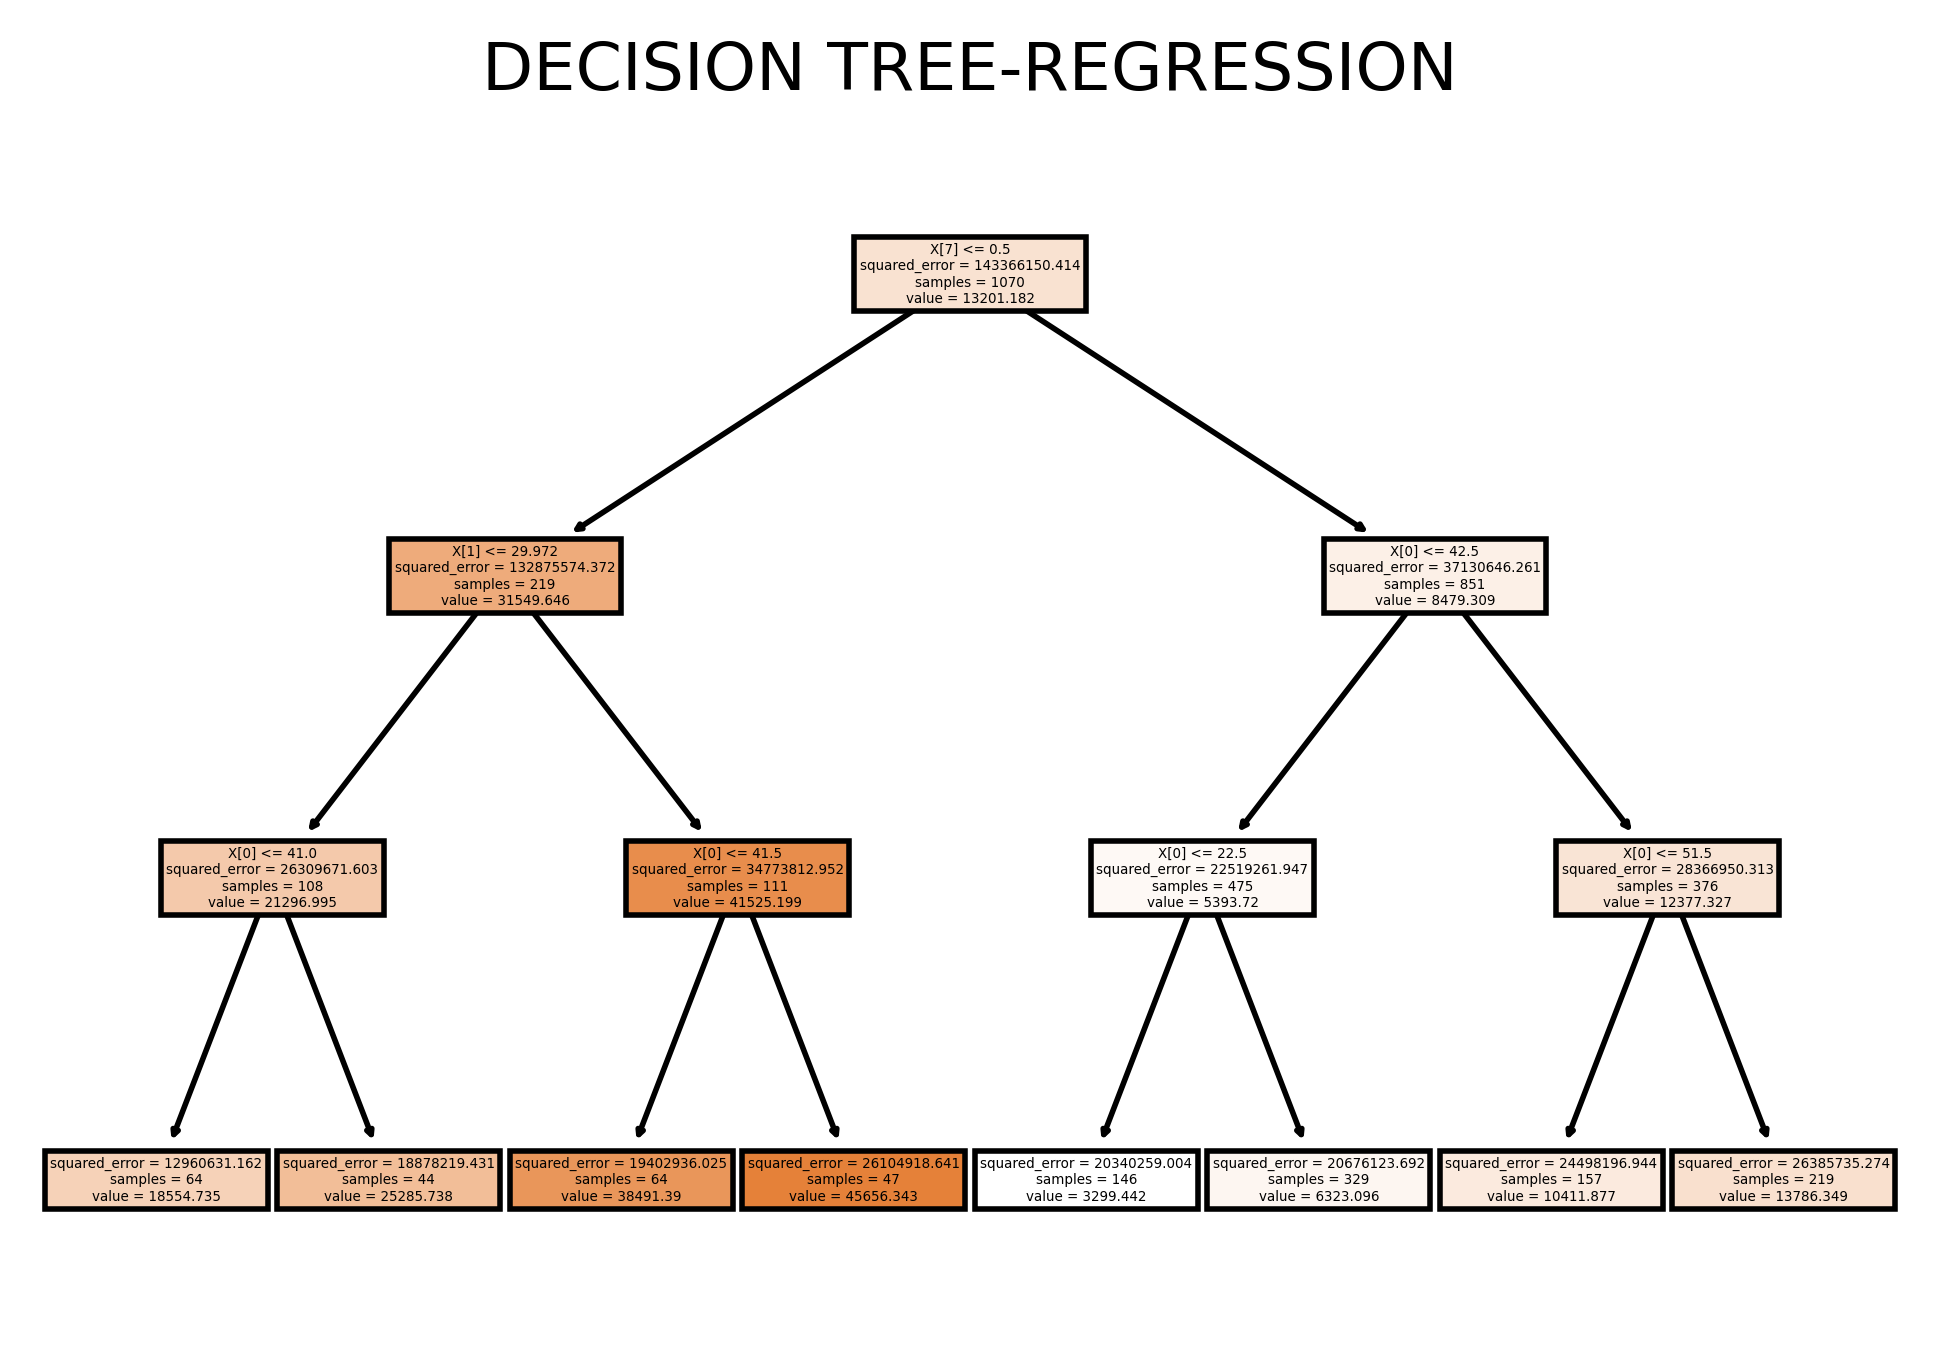

In [44]:
fig, axes = plt.subplots(dpi=400)

tree.plot_tree(dtm,filled = True)
plt.title('DECISION TREE-REGRESSION')
plt.show()
#fig.savefig('regression_decisiontree.png')

While comparing linear regression and decision tree,Decision tree performs well.

## OVERALL CONCLUSION

SUPERVISED LEARNING gives certain sets of criteria to charge the people based on that.

And UNSUPERVISED LEARNING groups the people based on BMI and Charges into different groups.

### SUPERVISED:-

The criteria for charges starts with

1)If Smoker=No , then check for bmi<=29.9

Then bmi is satisfied go for age<=41 ,if not satisfied go for age<=41.5

2)If Smoker=Yes , then check for age<=42.5

Then age is satisfied go for age<=22.5 ,if not satisfied go for age<=51.5

### UNSUPERVISED:-

In [49]:
insurance_df['Charges_Category']=df2['Charges_Category']
insurance_df.to_csv('INSURANCE.csv',index=False )
df=pd.read_csv('INSURANCE.csv')
df

,age,sex,bmi,children,smoker,region,charges,Charges_Category
0,19,female,27.900,0,yes,southwest,16884.92400,MEDIUM TIER2
1,18,male,33.770,1,no,southeast,1725.55230,MEDIUM TIER1
2,28,male,33.000,3,no,southeast,4449.46200,MEDIUM TIER1
3,33,male,22.705,0,no,northwest,21984.47061,HIGH TIER
4,32,male,28.880,0,no,northwest,3866.85520,MEDIUM TIER1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,MEDIUM TIER2
1334,18,female,31.920,0,no,northeast,2205.98080,MEDIUM TIER1
1335,18,female,36.850,0,no,southeast,1629.83350,MEDIUM TIER1
1336,21,female,25.800,0,no,southwest,2007.94500,MEDIUM TIER1


Charges_Category is a new column created based on K means clustering.

Where,

'LOW TIER' indicates charges value between      1121.87390 and 7749.15640

'MEDIUM TIER1' indicates charges value between  7789.63500 and 16884.92400

'MEDIUM TIER2' indicates charges value between  17043.34140 and 31620.00106

'HIGH TIER' indicates charges value between     32108.66282 and 63770.42801

In [46]:
#END